## load libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings("ignore")

we have Ecommerce Customers metadata

## Load the Dataset

In [2]:
ecommerce_data=pd.read_csv("Ecommerce Customers.csv")

In [3]:
# check the dataset
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# rename the col names
ecommerce_data.columns=[re.sub("[.\s]+",'_',c.lower()) for  c in ecommerce_data.columns]

In [7]:
# Let's find something intresting from email, address, avatar using regular ex
# 1. find domain of emails
# 2. split the address & find the state, zip_code,
# 3. if check avatar columns data. there mix themes 

In [13]:
ecommerce_data['email'][0][ecommerce_data['email'][0].find("@")+1:].split(".")[0]

'fernandez'

In [18]:
ecommerce_data['email_domain']=ecommerce_data['email'].apply(lambda email:email[email.find('@')+1:].split('.')[0])

In [37]:
# find state from address
ecommerce_data['state']=ecommerce_data['address'].apply(lambda add:add.split("\n")[1].split()[-2])
# find zip code
ecommerce_data['zip_code']=ecommerce_data['address'].apply(lambda add:add.split("\n")[1].split()[-1])
# find avatar theme
ecommerce_data['avatar_theme']=[re.findall(r'[A-Z][^A-Z]*',a)[-1] for  a in ecommerce_data['avatar']]

In [40]:
# check the data again
ecommerce_data.head()

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent,email_domain,state,zip_code,avatar_theme
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez,MI,82180-9605,Violet
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,CA,06566-8576,Green
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,DC,99414-7564,Bisque
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,OH,22070-1220,Brown
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman,PR,37242-1057,Marine


## EDA

<AxesSubplot: title={'center': 'Distribution by Avatars'}>

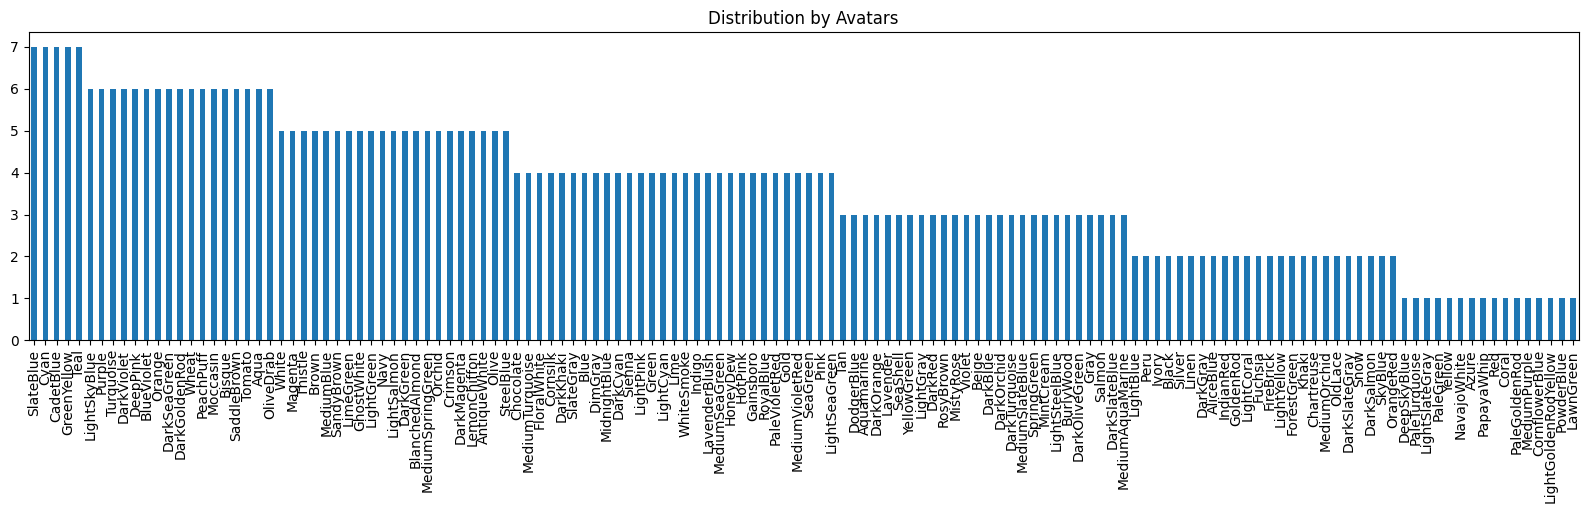

In [46]:
ecommerce_data.avatar.value_counts().plot.bar(figsize=(20, 4), title='Distribution by Avatars')

<AxesSubplot: title={'center': 'Distribution by Email Themes'}>

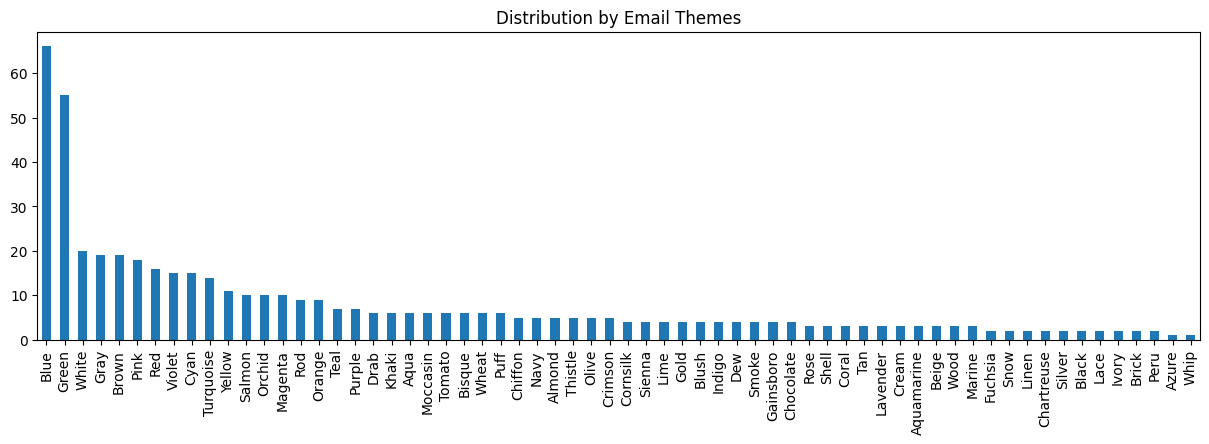

In [47]:
ecommerce_data.avatar_theme.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Email Themes')

<AxesSubplot: title={'center': 'Distribution by Avatar Themes - Simplified'}>

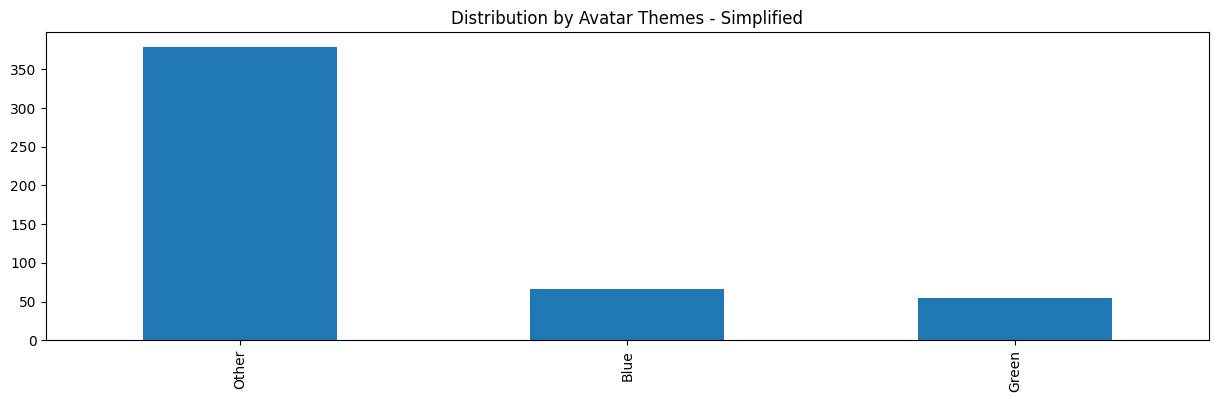

In [52]:
## Simplify the avatar themes. easy for OHE
ecommerce_data['avatar_theme3'] = ecommerce_data['avatar_theme'].apply(lambda x: x if x == 'Blue' or x == 'Green' else 'Other')
ecommerce_data.avatar_theme3.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Avatar Themes - Simplified')

<AxesSubplot: title={'center': 'Distribution by States'}>

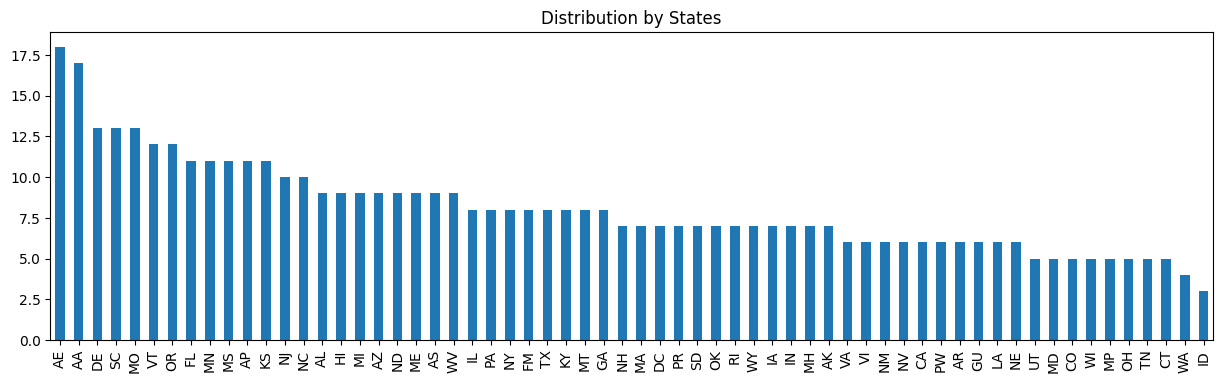

In [53]:
ecommerce_data.state.value_counts().plot.bar(figsize=(15, 4), title='Distribution by States')

<AxesSubplot: title={'center': 'Distribution by Email Domains'}>

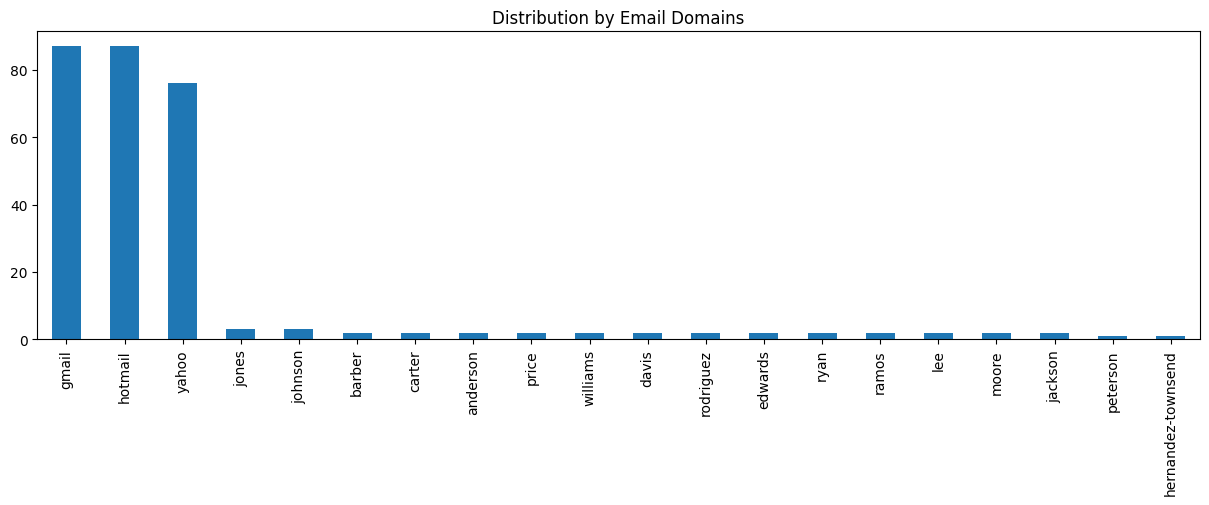

In [55]:
ecommerce_data.email_domain.value_counts().sort_values(ascending=False).head(20).plot.bar(figsize=(15, 4), title='Distribution by Email Domains')

<AxesSubplot: title={'center': 'Distribution by Email Domains - Simplified'}>

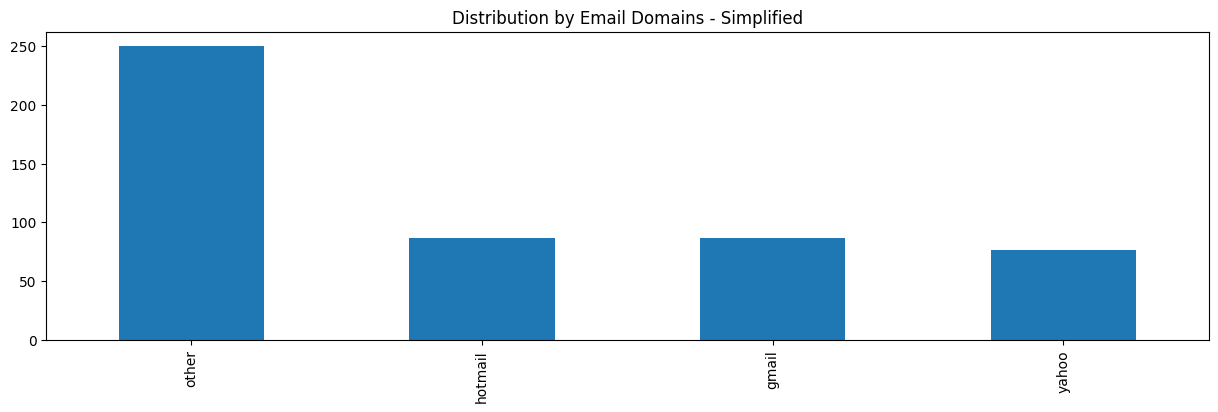

In [57]:
## Simplify the emails domain
ecommerce_data['email_domain1'] = ecommerce_data['email_domain'].apply(lambda x: x if x in ['hotmail','gmail','yahoo'] else 'other')
ecommerce_data.email_domain1.value_counts().plot.bar(figsize=(15, 4), title='Distribution by Email Domains - Simplified')

## EDA: Continuous

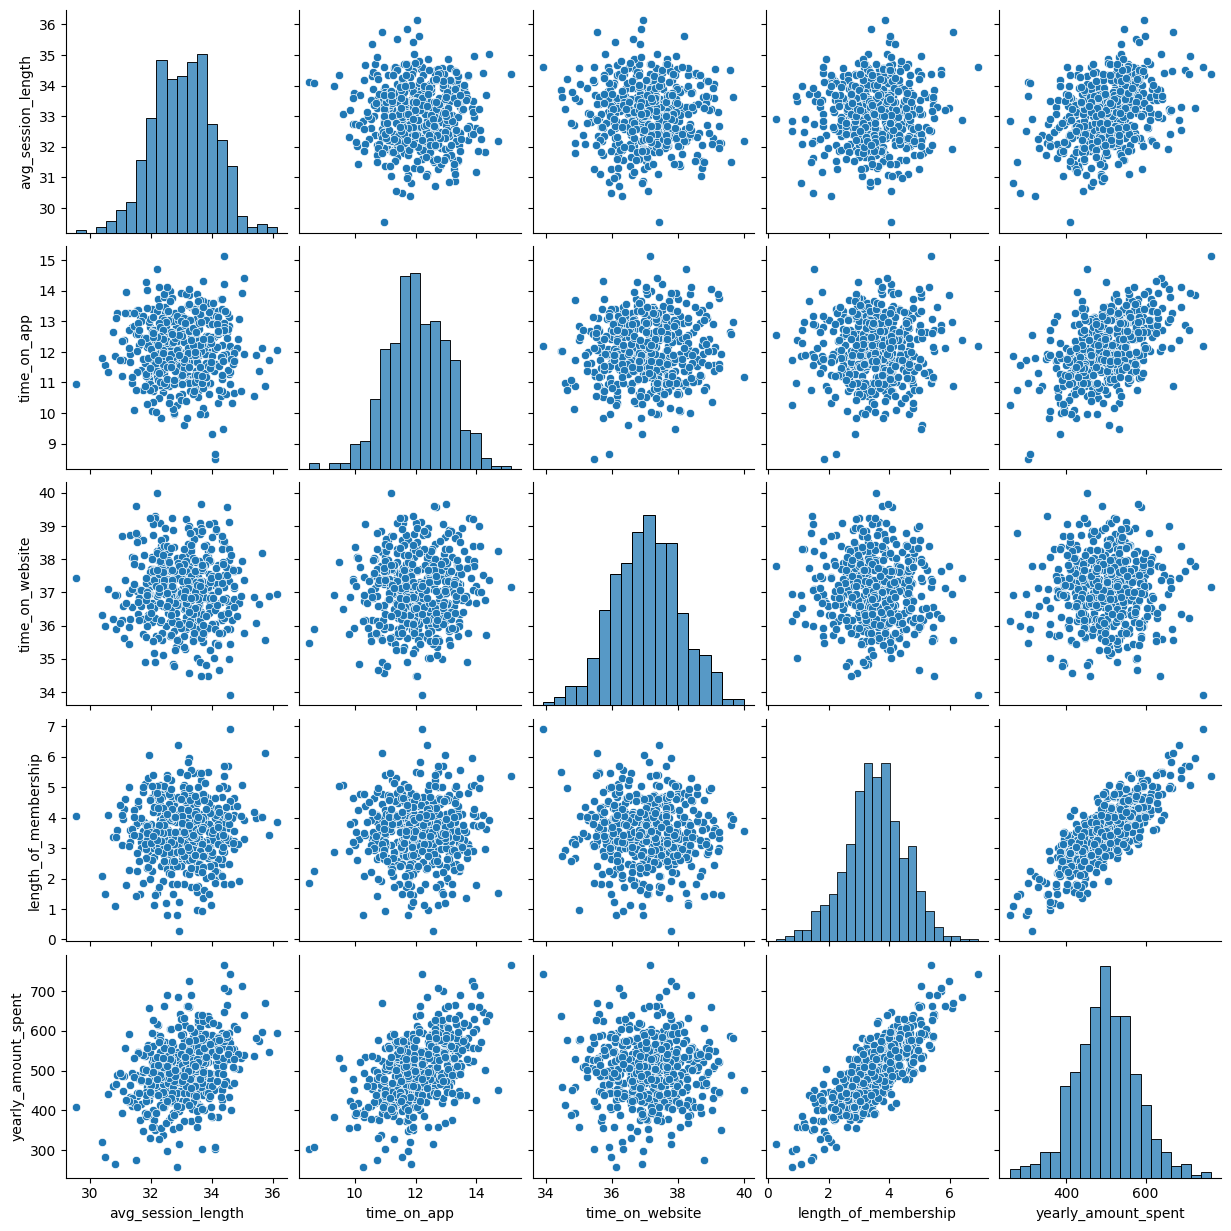

In [58]:
sns.pairplot(ecommerce_data)

<AxesSubplot: >

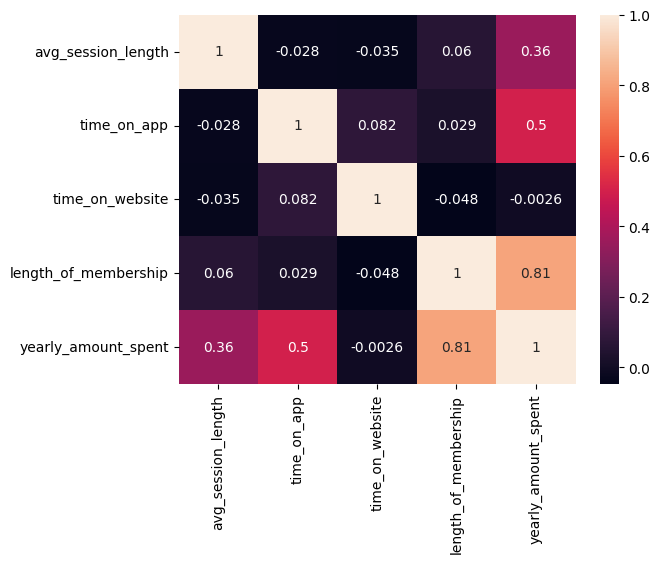

In [61]:
sns.heatmap(ecommerce_data.corr(),annot=True)

***The very first variable to pay attention is yearly_amount_spent, this is highly correlated with length_of_membership => Intuitively speaking, the longer you stay the more value you generated EDA would aim to look into distribution of each variables, and the interactions among them (especially the interaction with target variables) Though the relationship with other variables seems unclear. But we observe a positive correlation (in heatmap) between yearly_amount_spent vs. time_on_app and session_length***

### Check the Realtionship between Categorical Variables and Continuous Target Variables

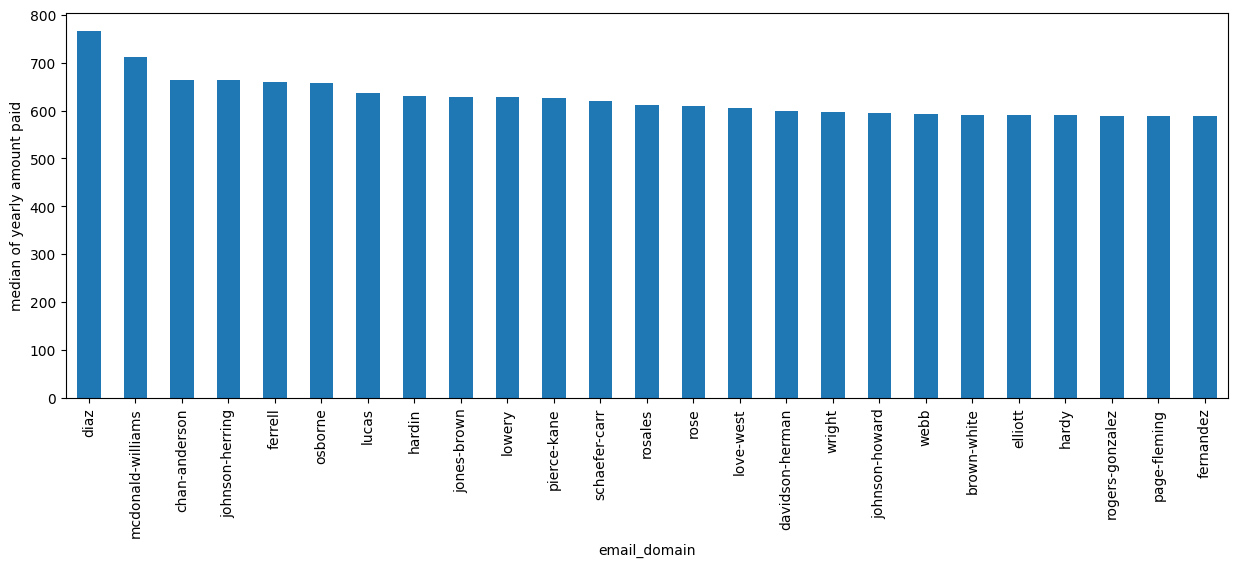

In [75]:
ecommerce_data.groupby('email_domain').yearly_amount_spent.median().sort_values(ascending=False).head(25).plot.bar(figsize=(15,5))
plt.ylabel("median of yearly amount paid")
plt.show()

<AxesSubplot: xlabel='email_domain1'>

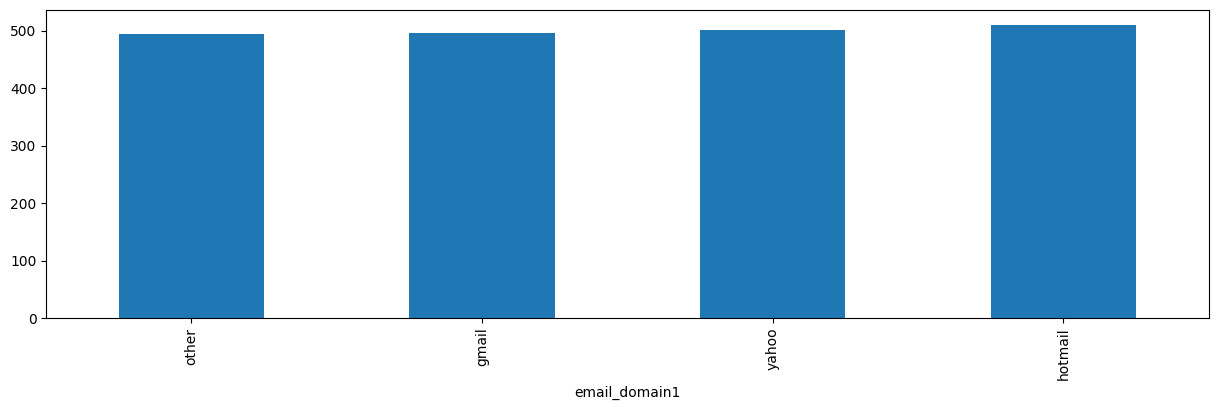

In [71]:
ecommerce_data.groupby('email_domain1').yearly_amount_spent.median().sort_values().head(20).plot.bar(figsize=(15, 4))

<AxesSubplot: xlabel='avatar_theme'>

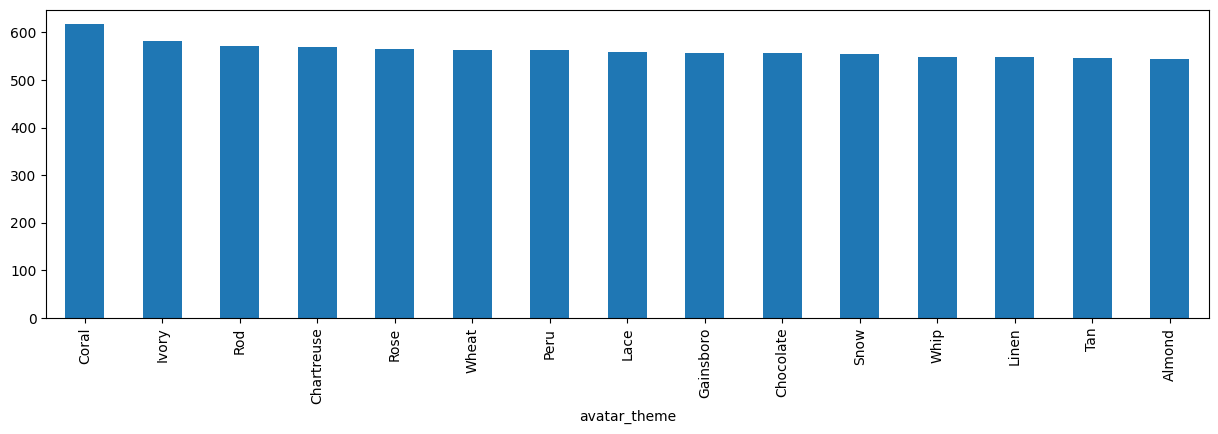

In [74]:
ecommerce_data.groupby('avatar_theme').yearly_amount_spent.median().sort_values(ascending=False).head(15).plot.bar(figsize=(15, 4))

In [81]:
ecommerce_data.groupby('avatar_theme3').yearly_amount_spent.median().sort_values()

avatar_theme3
Green    492.945053
Blue     499.318087
Other    502.092528
Name: yearly_amount_spent, dtype: float64

<AxesSubplot: xlabel='state'>

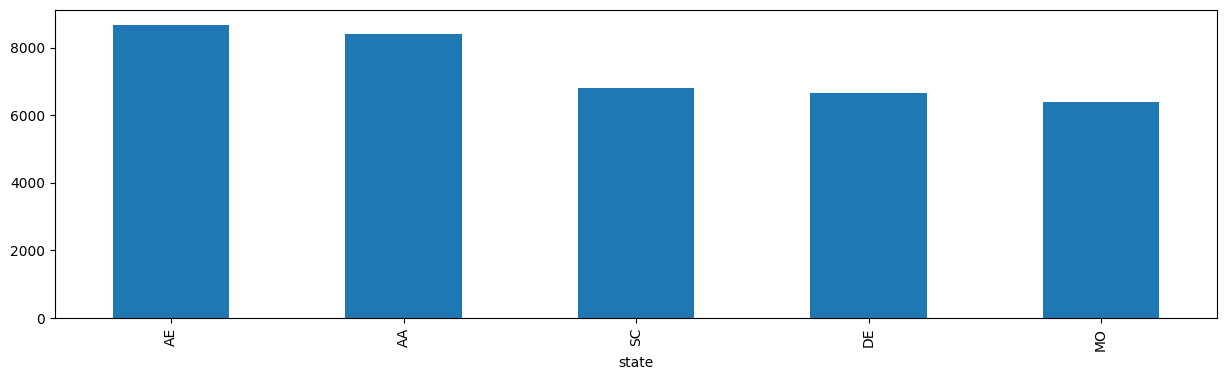

In [82]:
# Top 5 state
ecommerce_data.groupby('state').yearly_amount_spent.sum().sort_values(ascending=False).head().plot.bar(figsize=(15, 4))

<AxesSubplot: xlabel='yearly_amount_spent', ylabel='Density'>

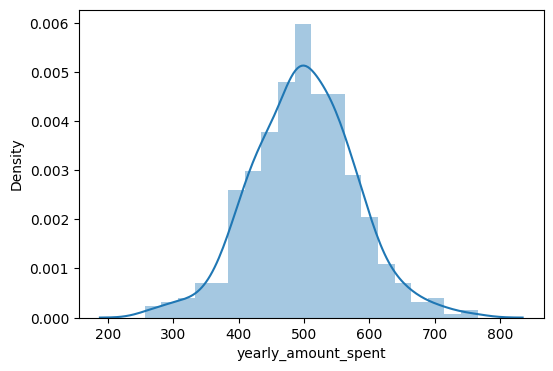

In [84]:
# quantity of yearly_amount_spent (numeric) is the target of regression problem
plt.figure(figsize = (6,4))
sns.distplot(ecommerce_data['yearly_amount_spent'])

In [87]:
# create the binary variable (=1 if yearly_amount_spent > 0.8)
print("Yearly Amount Spent at 80% :: ",ecommerce_data['yearly_amount_spent'].quantile(0.8))
ecommerce_data['is_highval'] = ecommerce_data['yearly_amount_spent'] > ecommerce_data['yearly_amount_spent'].quantile(0.8)
ecommerce_data['is_highval'].value_counts()

Yearly Amount Spent at 80% ::  560.7514348952261


False    400
True     100
Name: is_highval, dtype: int64

## Check Linearity (For Linear Regression)

In [96]:
def linearity_check(x_var,y_var="yearly_amount_spent"):
    ecommerce_data[x_var + '_10bin'] = pd.qcut(ecommerce_data[x_var], q=10, labels=False) # divide to 10 bins equals in n
    ecommerce_data.groupby(x_var + '_10bin')[y_var].mean().plot(title='Linearity check: {} vs. {}'.format(x_var, y_var))

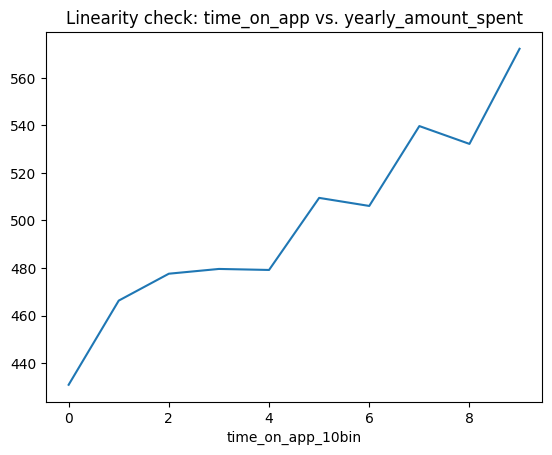

In [97]:
# Try other: avg_session_length, time_on_app, time_on_website, length_of_membership
linearity_check("time_on_app")

In [101]:
# Split cat and numeric variables

cat_cols = ['avatar_theme3','email_domain1','state']
num_cols = ['avg_session_length','time_on_app','time_on_website','length_of_membership']
y_col = ['yearly_amount_spent']
y_class = ['is_highval']
one_hot_df = pd.get_dummies(ecommerce_data[cat_cols])
one_hot_cols = one_hot_df.columns
final_df = pd.merge(ecommerce_data, one_hot_df, left_index=True, right_index=True)
final_df = df_model[num_cols + list(one_hot_cols) + y_class + y_col]
final_df.head()

,avg_session_length,time_on_app,time_on_website,length_of_membership,avatar_theme3_Blue,avatar_theme3_Green,avatar_theme3_Other,email_domain1_gmail,email_domain1_hotmail,email_domain1_other,...,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,is_highval,yearly_amount_spent
0,34.497268,12.655651,39.577668,4.082621,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,True,587.951054
1,31.926272,11.109461,37.268959,2.664034,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,False,392.204933
2,33.000915,11.330278,37.110597,4.104543,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,False,487.547505
3,34.305557,13.717514,36.721283,3.120179,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,True,581.852344
4,33.330673,12.795189,37.536653,4.446308,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,True,599.406092


In [106]:
# Split train set - test set
X = final_df.iloc[:,:-2]
# for regression
y = final_df.iloc[:,-1]
# for classification
y_class = final_df.iloc[:,-2]

In [ ]:
# Split the data

In [110]:
from sklearn.model_selection import train_test_split

# for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# for classification
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

## 1. Unsupervised (K-means Clustering)

In [113]:
# select only continue data for this
X_train.iloc[:,:4]

,avg_session_length,time_on_app,time_on_website,length_of_membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# apply Standard scaling
scaled_X_train = StandardScaler().fit_transform(X_train.iloc[:,:4])

# apply 3 cluster
kmeans = KMeans(init="random",
 n_clusters=3,
 n_init=10,
 max_iter=300,
 random_state=1234)
kmeans.fit(scaled_X_train)

KMeans(init='random', n_clusters=3, random_state=1234)

In [115]:
print('The lowest SSE value: {}'.format(kmeans.inertia_))
print('Number of Iterations to Converge: {}'.format(kmeans.n_iter_))
print('--- Locations of the Centroid ---')
print(kmeans.cluster_centers_)

The lowest SSE value: 1000.0559005419155
Number of Iterations to Converge: 23
--- Locations of the Centroid ---
[[ 0.1177615   0.72215498  0.74667345  0.23406473]
 [ 0.54380777 -0.66408572 -0.45953869  0.59496923]
 [-0.58226653 -0.11999412 -0.32002823 -0.7380275 ]]


In [ ]:
##  Elbow Method Plot wcsse

In [116]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(scaled_X_train)
 sse.append(kmeans.inertia_)

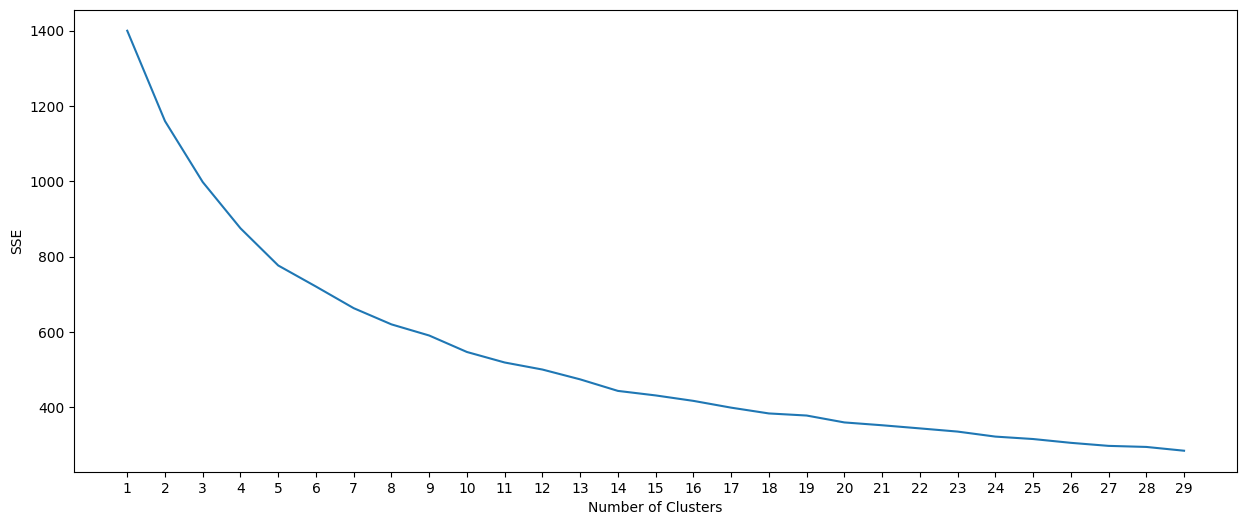

In [117]:
plt.figure(figsize = (15,6))
plt.plot(range(1, 30), sse)
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [131]:
# Determine by kneed
from kneed import KneeLocator
# pass sse to the model
kl = KneeLocator(range(1, 30), sse, curve="convex", direction="decreasing")
print('K-mean Elbow: {}'.format(kl.elbow))

K-mean Elbow: 10


### Silhouette Coefficient A measure of cluster cohesion and separation
- select high Silhouette Coefficient.

In [133]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(scaled_X_train)
 score = silhouette_score(scaled_X_train, kmeans.labels_)
 silhouette_coefficients.append(score)

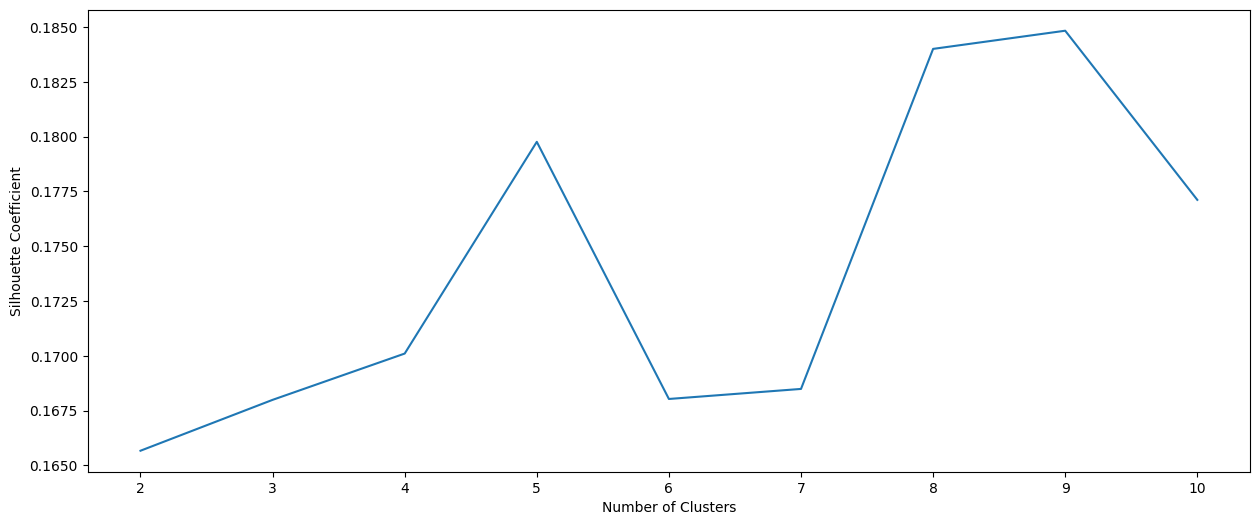

In [134]:
plt.figure(figsize = (15,6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [137]:
features = ['avg_session_length', 'time_on_app','time_on_website','length_of_membership']
k_means_model = KMeans(n_clusters=3)
k_means=k_means_model.fit(ecommerce_data[features])
ecommerce_data['cluster'] = k_means.labels_

In [139]:
ecommerce_data.groupby('cluster')[features].median()

,avg_session_length,time_on_app,time_on_website,length_of_membership
cluster,,,,
0,33.474395,11.517758,36.293809,3.884774
1,33.531860,12.542481,37.792238,3.892891
2,32.338899,12.149375,37.067090,3.010210


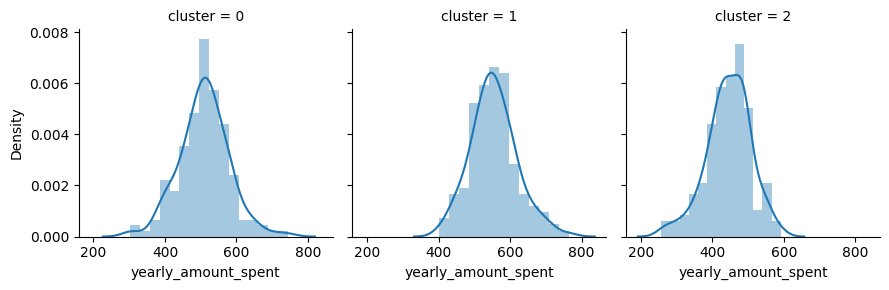

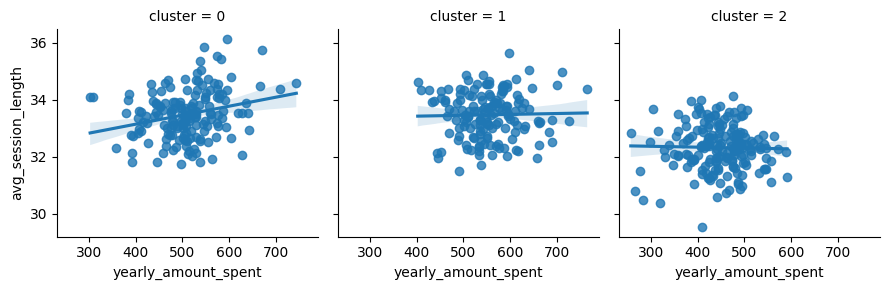

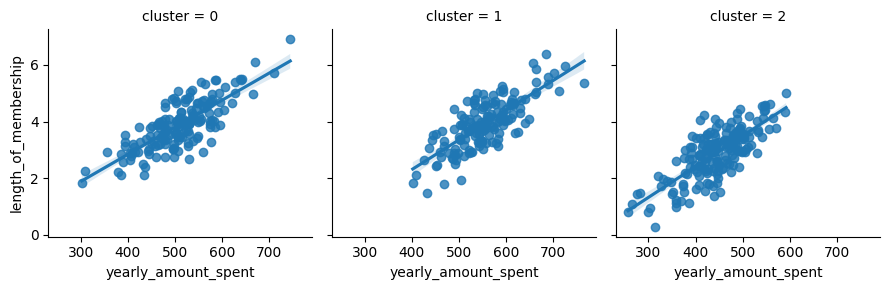

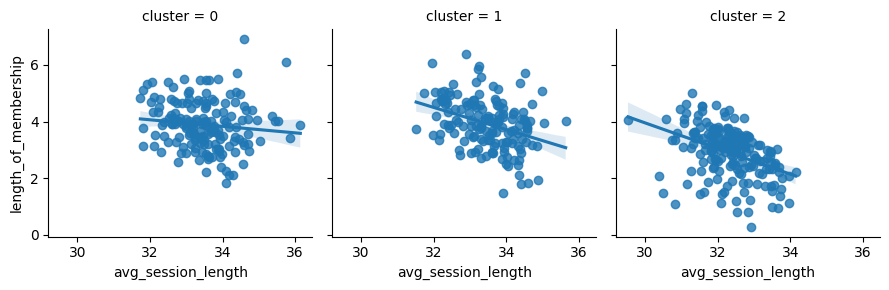

In [141]:
g = sns.FacetGrid(data=ecommerce_data, col='cluster')
g.map(sns.distplot, 'yearly_amount_spent')
g = sns.FacetGrid(data=ecommerce_data, col='cluster')
g.map(sns.regplot, 'yearly_amount_spent','avg_session_length')
g = sns.FacetGrid(data=ecommerce_data, col='cluster')
g.map(sns.regplot, 'yearly_amount_spent','length_of_membership')
g = sns.FacetGrid(data=ecommerce_data, col='cluster')
g.map(sns.regplot, 'avg_session_length','length_of_membership')

### PCA Principal Components Analysis is the technique to reduce the dimensions

In [146]:
from sklearn.decomposition import PCA

pca_model=PCA(n_components=2,whiten=True)
pca_model.fit(ecommerce_data[features])

print('Explained Variance Ratio:', str(pca_model.explained_variance_ratio_))

Explained Variance Ratio: [0.28084573 0.2597583 ]


In [149]:
dataPCA = pca_model.transform(ecommerce_data[features])
dataPCA = pd.DataFrame(dataPCA, columns= ['PC1','PC2'])
dataPCA['yearly_amount_spent'] = ecommerce_data['yearly_amount_spent']
dataPCA.head()

,PC1,PC2,yearly_amount_spent
0,-1.110552,1.748838,587.951054
1,-0.515863,-1.475379,392.204933
2,0.447967,-0.035489,487.547505
3,-0.103148,1.030833,581.852344
4,-0.179926,1.251312,599.406092


<Figure size 1000x500 with 0 Axes>

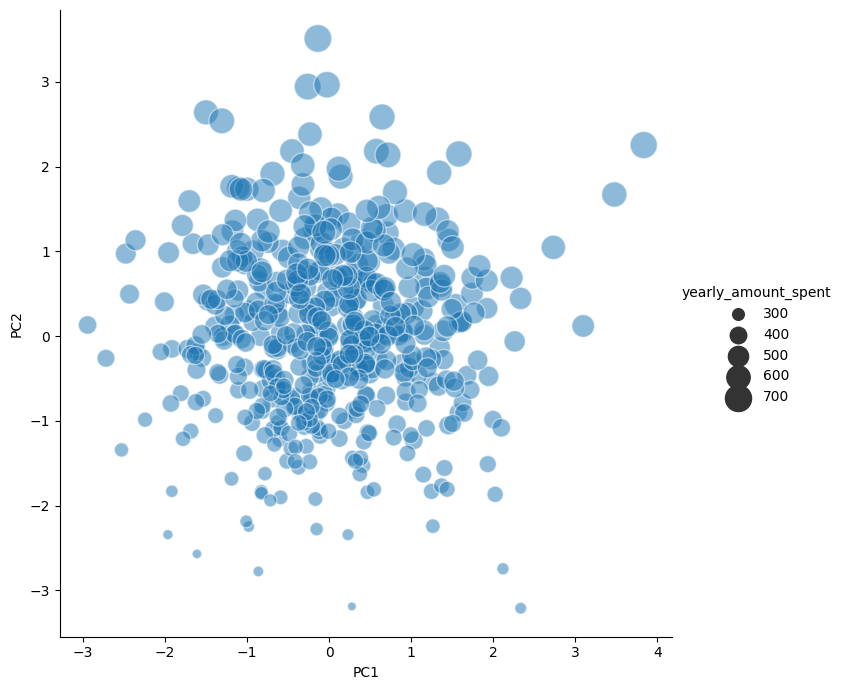

In [154]:
plt.figure(figsize=(10,5))
sns.relplot(x="PC1", y="PC2", size="yearly_amount_spent",
 sizes=(40, 400), alpha=.5, palette="muted",height=7, data=dataPCA)

## PCA for K-Means

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Min_Max_Scalar=(X-Xmin/Xmax-Xmin)

# Std_sclar=(X-U)/Std

In [178]:
# K_means Clustering Pipe
cluster_pipe=Pipeline([("k_means",KMeans(n_clusters=3,random_state=42))])

# Scaling and PCA pipe
scalar_pca=Pipeline([('min_max_scalar',MinMaxScaler()),
                   ("pca",PCA(n_components=2,random_state=42))])

# Integrate Scaling >> PCA >> Clustering
final_pipe=Pipeline([("scaling_pca",scalar_pca),
                    ("clustering",cluster_pipe)])

# train the model
final_pipe.fit(ecommerce_data[features])

Pipeline(steps=[('scaling_pca',
                 Pipeline(steps=[('min_max_scalar', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clustering',
                 Pipeline(steps=[('k_means',
                                  KMeans(n_clusters=3, random_state=42))]))])

In [176]:
# final_pipe.transform(ecommerce_data[features])

In [165]:
predicted_labels=final_pipe['clustering']['k_means'].labels_
preprocessed_data = final_pipe['scaling_pca'].transform(ecommerce_data[features])
# preprocessed_data

In [166]:
# check the Silhouette Score for num of clusters
print('Silhouette Score: {}'.format(silhouette_score(preprocessed_data, predicted_labels)))

Silhouette Score: 0.3297734793275591


In [179]:
data=ecommerce_data[features]

pca_df=pd.DataFrame(final_pipe['scaling_pca'].transform(data),columns=['PC1','PC2'])
pca_df['cluster']=final_pipe['clustering']['k_means'].labels_

pca_df['yearly_amount_spent']=ecommerce_data['yearly_amount_spent']
pca_df.head()

,PC1,PC2,cluster,yearly_amount_spent
0,-0.343729,-0.275647,2,587.951054
1,-0.046980,0.238423,1,392.204933
2,0.040680,-0.017649,0,487.547505
3,0.000331,-0.147084,2,581.852344
4,-0.071035,-0.177258,2,599.406092


<Figure size 1000x500 with 0 Axes>

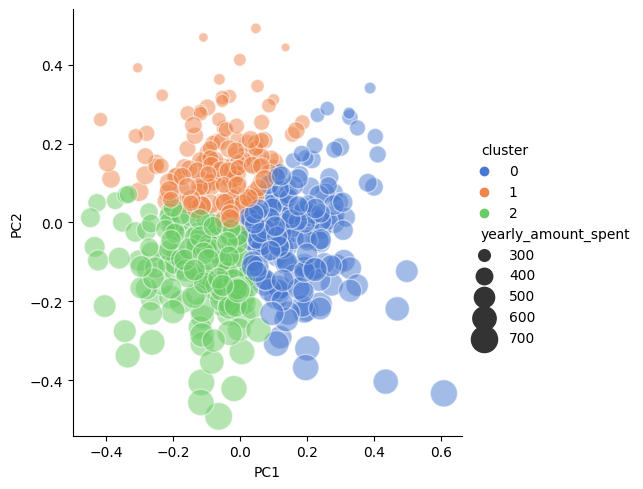

In [180]:
plt.figure(figsize=(10,5))
sns.relplot(x="PC1", y="PC2", hue='cluster', size="yearly_amount_spent",
 sizes=(40, 400), alpha=.5, palette="muted",
 data=pca_df)

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
 ('std_scalar', StandardScaler())
])

pca_pipeline = Pipeline([
 ('minmax_scaler', MinMaxScaler()),
 ('pca', PCA(n_components=2, random_state=42))
])

# apply std scling
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# apply scaling with pca
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

In [220]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [235]:
# cross validation model selection
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

# write the functions for regression models
# evaluate results and print
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


# evaluate results and return
def evaluate(model,data,true):
    predicted=model.predict(data)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# write the function for classification model evalution
def eval_class(true, predicted):
    acc = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 =f1_score(true, predicted)
    log_loss =log_loss(true, predicted)
    auc = roc_auc_score(true, predicted)
    return acc, precision, recall, f1, log_loss, auc


def print_evaluate_class(true, predicted):
    acc = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 =f1_score(true, predicted)
    log_loss =log_loss(true, predicted)
    auc = roc_auc_score(true, predicted)
    print('Accuracy score ::', acc)
    print('Precision ::', precision)
    print('Recall ::', recall)
    print('f1 ::', f1)
    print('Log Loss ::', log_loss)
    print('Auc ::', auc)
    print('__________________________________')


def test_results(model,x_train,x_test,y_train,y_test,test='regression'):
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    if test=='regression':
        print('Test set evaluation:\n_____________________________________')
        print_evaluate(y_test, test_pred)
        print('====================================')
        print('Train set evaluation:\n_____________________________________')
        print_evaluate(y_train, train_pred)
    else:
        print('Test set evaluation:\n_____________________________________')
        print_evaluate_class(y_test, test_pred)
        print('====================================')
        print('Train set evaluation:\n_____________________________________')
        print_evaluate_class(y_train, train_pred)

In [222]:
def plot_feature_importance(importance,names,model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    # Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    # Define size of bar plot
    plt.figure(figsize=(10,8))
    # Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    # Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [265]:
def predict_joinplot(model,data,y_true):
    pred = model.predict(data)
    plt.figure(figsize = (2,2))
    sns.jointplot(x= y_true,y= pred,kind='reg')
    plt.grid()
    plt.show()
    
    
def predict_plot(model,data,y_true):
    pred = model.predict(data)
    plt.figure(figsize = (15,6))
    x_ax = range(len(data))
    plt.title("Original Vs Prediction Plot")
    plt.plot(x_ax, y_true, lw=1, color="blue", label="original")
    plt.plot(x_ax, pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
    plt.legend()
    plt.grid()
    plt.show()

In [204]:
import shap
# Summary bee-swarm plot to show the global importance of each features and
# distribution of effect size
def plot_shap_feature_importance(model, X, feature_names):
    shap_values = shap.TreeExplainer(xgb).shap_values(X)
    shap.summary_plot(shap_values, X, feature_names)

# Dependence Plot to investigate the interaction between features
def plot_shap_feature_interaction(model, X, feature_names, f_orders = (1,2)):
    shap_interaction_values = shap.TreeExplainer(xgb).shap_interaction_values(X)
    shap.dependence_plot(f_orders, shap_interaction_values, X,feature_names)

## LinearRegression

In [205]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [206]:
# print the intercept
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df.head()

502.3695050722297


,Coefficient
avg_session_length,2.486575e+01
time_on_app,3.881671e+01
time_on_website,4.438015e-01
length_of_membership,6.346741e+01
avatar_theme3_Blue,7.121233e+12


<Figure size 200x200 with 0 Axes>

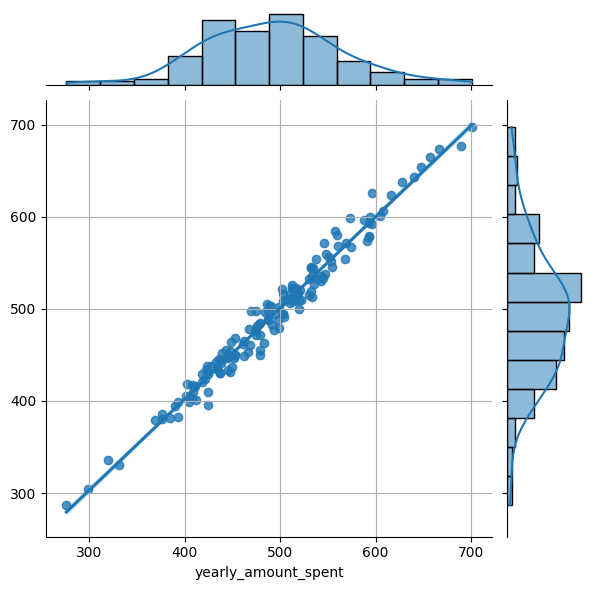

In [210]:
# plot the join plot actual vs predicted
predict_joinplot(lin_reg,X_test)

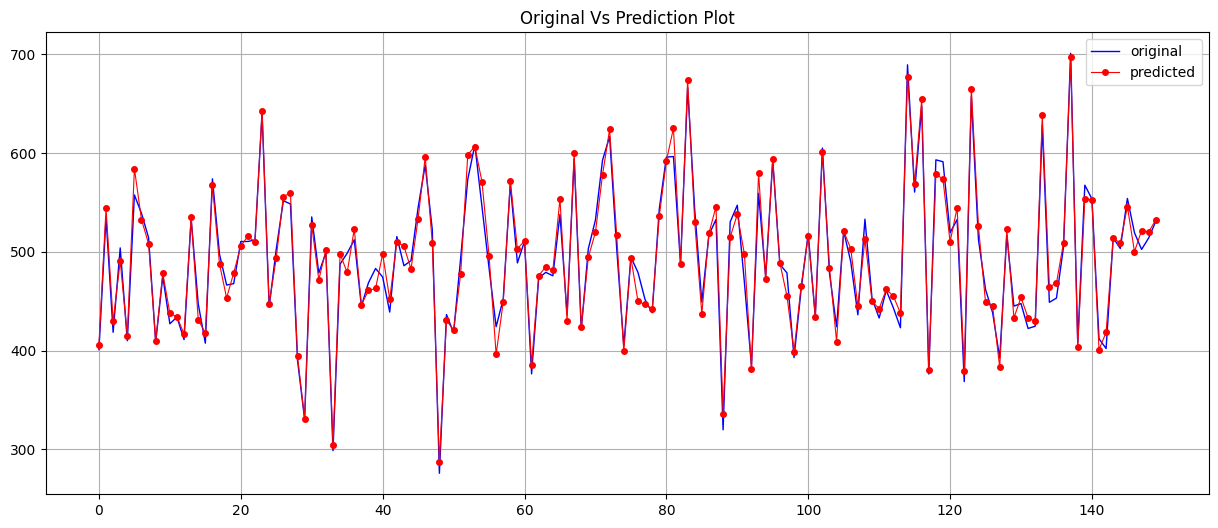

In [214]:
predict_plot(lin_reg,X_test,y_test)

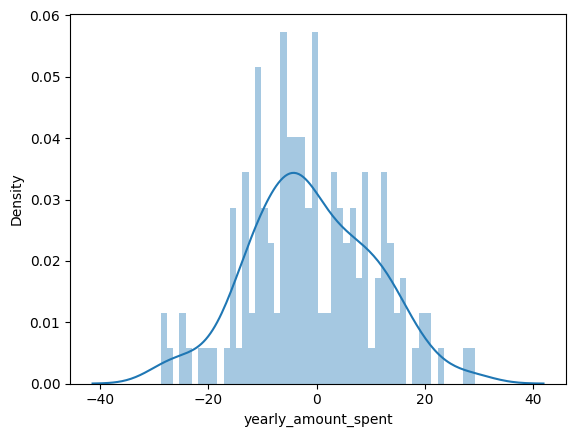

In [217]:
# check the assumption normality of residuls
pred = lin_reg.predict(X_test)
sns.distplot((y_test - pred), bins=50);

In [228]:
# check the results
test_results(lin_reg,X_train,X_test,y_train,y_test)

Test set evaluation:
_____________________________________
MAE: 9.217291909912195
MSE: 130.27217491159132
RMSE: 11.413683669683127
R2 Square 0.9760251857436397
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.049538793598341
MSE: 80.07562907534535
RMSE: 8.948498705109442
R2 Square 0.9878841499790246
__________________________________


In [315]:
# type(pd.DataFrame())

In [327]:
def record_results(model_name,model,x_train,x_test,y_train,y_test,last_result=None):
    eval_metrics = ['MAE', 'MSE', 'RMSE', 'R2_Square']
    eval_m_train = [m + '_train' for m in eval_metrics]
    eval_m_test = [m + '_test' for m in eval_metrics]
    dis_m = ['Model','RMSE_train'] + eval_m_test + ['diff_RMSE_train_test']
    results_df = pd.DataFrame(data=[[model_name,*evaluate(model,x_train,y_train),*evaluate(model,x_test,y_test)]],
     columns=[['Model'] + eval_m_train + eval_m_test ])
    results_df['diff_RMSE_train_test'] = results_df.apply(lambda x: (x.RMSE_test - x.RMSE_train)/x.RMSE_train, axis=1)
    return results_df[dis_m]

In [328]:
last_result=record_results("Linear Regression",lin_reg,X_train,X_test,y_train,y_test)
last_result

,Model,RMSE_train,MAE_test,MSE_test,RMSE_test,R2_Square_test,diff_RMSE_train_test
0,Linear Regression,8.948499,9.217292,130.272175,11.413684,0.976025,0.275486


## Overfitting

In [262]:
# train RMSE >> 8.94 and test RMSE >> 11.41
# drop all cat variable keep only numeric variables
features_name=X.columns[:4]
lin_reg1=LinearRegression(normalize=True)
lin_reg1.fit(X_train[:,:4],y_train)

# print the intercept
print(lin_reg1.intercept_)
coeff_df = pd.DataFrame(lin_reg1.coef_, features_name, columns=['Coefficient'])
coeff_df

502.36544675088646


,Coefficient
avg_session_length,25.468114
time_on_app,38.743243
time_on_website,0.468548
length_of_membership,63.353471


<Figure size 200x200 with 0 Axes>

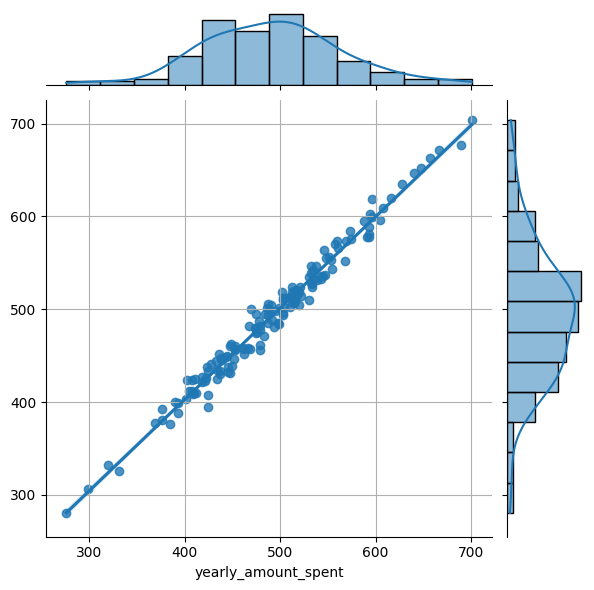

In [266]:
predict_joinplot(lin_reg1,X_test[:,:4],y_test)

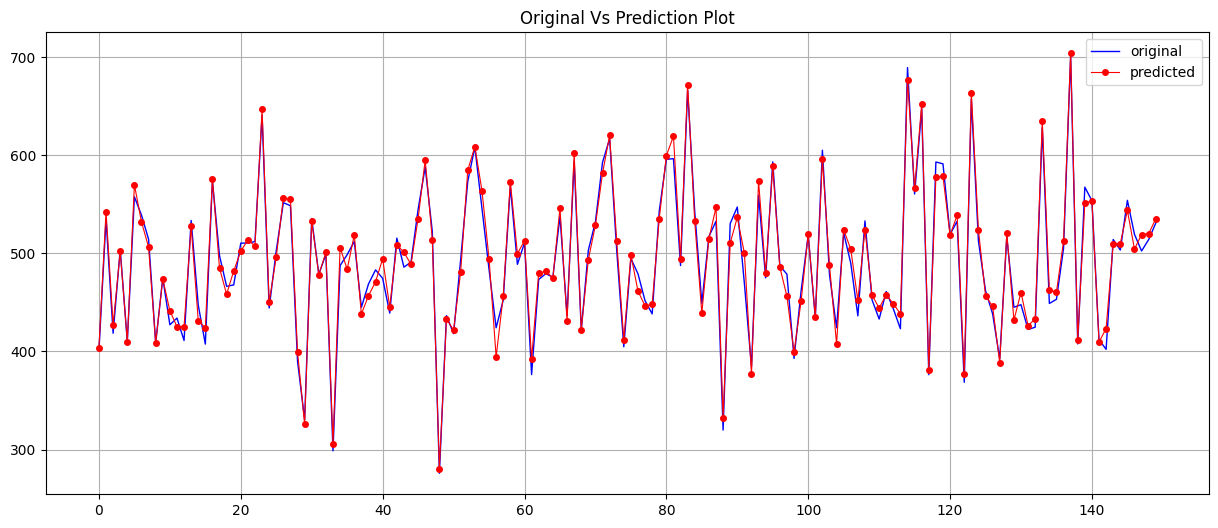

In [267]:
predict_plot(lin_reg1,X_test[:,:4],y_test)

In [330]:
record_results("Linear Regression-Numeric",lin_reg1,X_train[:,:4],X_test[:,:4],y_train,y_test)

,Model,RMSE_train,MAE_test,MSE_test,RMSE_test,R2_Square_test,diff_RMSE_train_test
0,Linear Regression-Numeric,9.820232,8.426092,103.915541,10.193897,0.980876,0.038051


## Linear Regression with PCA

In [332]:
lin_reg_pca=LinearRegression(normalize=True)
lin_reg_pca.fit(X_train_pca,y_train)

LinearRegression(normalize=True)

In [338]:
record_results("Linear Regression-pca",lin_reg_pca,X_train_pca,X_test_pca,y_train,y_test)

,Model,RMSE_train,MAE_test,MSE_test,RMSE_test,R2_Square_test,diff_RMSE_train_test
0,Linear Regression-pca,81.041989,58.054988,5530.838686,74.369609,-0.017875,-0.082332


## Polynomial Regression

In [340]:
from sklearn.preprocessing import PolynomialFeatures

## Processing
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train[:,:4])
X_test_2d = poly_reg.transform(X_test[:,:4])

## Fitting
lin_reg3 = LinearRegression(normalize=True)
lin_reg3.fit(X_train_2d,y_train)

In [341]:
record_results("Linear Regression-PolynomialFeatures",lin_reg3,X_train_2d,X_test_2d,y_train,y_test)

,Model,RMSE_train,MAE_test,MSE_test,RMSE_test,R2_Square_test,diff_RMSE_train_test
0,Linear Regression-PolynomialFeatures,9.682298,8.594293,109.347404,10.456931,0.979876,0.080005


## SVM

In [342]:
from sklearn.svm import SVR

svm_reg=SVR(kernel='rbf',C=1,epsilon=20)
svm_reg.fit(X_train[:,:4],y_train)

SVR(C=1, epsilon=20)

In [343]:
record_results("Linear Regression-SVR",svm_reg,X_train[:,:4],X_test[:,:4],y_train,y_test)

,Model,RMSE_train,MAE_test,MSE_test,RMSE_test,R2_Square_test,diff_RMSE_train_test
0,Linear Regression-SVR,65.519243,43.659695,3507.040323,59.22027,0.354577,-0.096139
